In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
import pandas as pd

# Import dataset
dataset = pd.read_csv('datasets.csv')

# Kelompokkan data berdasarkan label
grouped_data = dataset.groupby('label')

# Tampilkan 5 data pertama dari setiap label
for label, label_data in grouped_data:
  print(f"\nLabel: {label}")
  print(label_data.head().to_string(index=False))


Label: DDOS_ICMP
 datapath_id  version  header_length  tos  total_length  flags  offset  ttl  proto  csum          src_ip   dst_ip  src_port  dst_port  tcp_flag  type_icmp  code_icmp  csum_icmp  port_no  rx_bytes_ave  rx_error_ave  rx_dropped_ave  tx_bytes_ave  tx_error_ave  tx_dropped_ave     label
           1        4              5    0            28      0       0  250      1 16079    117.77.2.192 10.0.0.4         0         0         0          8          0      63239        1            42             0               0           118             0               0 DDOS_ICMP
           1        4              5    0            28      0       0  250      1 14740 165.203.215.124 10.0.0.4         0         0         0          8        138      63057        1            42             0               0           115             0               0 DDOS_ICMP
           1        4              5    0            28      0       0  250      1 20388 109.117.249.194 10.0.0.4         0       

In [3]:
# Check the features
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   datapath_id     600000 non-null  int64 
 1   version         600000 non-null  int64 
 2   header_length   600000 non-null  int64 
 3   tos             600000 non-null  int64 
 4   total_length    600000 non-null  int64 
 5   flags           600000 non-null  int64 
 6   offset          600000 non-null  int64 
 7   ttl             600000 non-null  int64 
 8   proto           600000 non-null  int64 
 9   csum            600000 non-null  int64 
 10  src_ip          600000 non-null  object
 11  dst_ip          600000 non-null  object
 12  src_port        600000 non-null  int64 
 13  dst_port        600000 non-null  int64 
 14  tcp_flag        600000 non-null  int64 
 15  type_icmp       600000 non-null  int64 
 16  code_icmp       600000 non-null  int64 
 17  csum_icmp       600000 non-nu

In [7]:
# menampilkan informasi statistik dataset
dataset.describe()

,datapath_id,version,header_length,tos,total_length,flags,offset,ttl,proto,csum,...,type_icmp,code_icmp,csum_icmp,port_no,rx_bytes_ave,rx_error_ave,rx_dropped_ave,tx_bytes_ave,tx_error_ave,tx_dropped_ave
count,420000.0,420000.0,420000.0,420000.0,420000.000000,420000.0,420000.0,420000.000000,420000.000000,420000.000000,...,420000.000000,420000.000000,420000.000000,420000.0,420000.000000,420000.0,420000.0,420000.000000,420000.0,420000.0
mean,1.0,4.0,5.0,0.0,38.666667,0.0,0.0,126.000000,8.000000,29582.624348,...,7.333257,81.643438,63363.863471,1.0,49.141890,0.0,0.0,113.278310,0.0,0.0
std,0.0,0.0,0.0,0.0,9.159099,0.0,0.0,87.681345,6.683321,13770.511591,...,2.211201,88.830461,606.359741,0.0,4.209329,0.0,0.0,1.942621,0.0,0.0
min,1.0,4.0,5.0,0.0,28.000000,0.0,0.0,64.000000,1.000000,0.000000,...,0.000000,0.000000,62722.000000,1.0,42.000000,0.0,0.0,111.000000,0.0,0.0
25%,1.0,4.0,5.0,0.0,28.000000,0.0,0.0,64.000000,1.000000,26302.000000,...,8.000000,0.000000,63016.000000,1.0,46.000000,0.0,0.0,112.000000,0.0,0.0
50%,1.0,4.0,5.0,0.0,40.000000,0.0,0.0,64.000000,6.000000,26316.000000,...,8.000000,0.000000,63233.000000,1.0,51.000000,0.0,0.0,113.000000,0.0,0.0
75%,1.0,4.0,5.0,0.0,41.000000,0.0,0.0,250.000000,17.000000,32833.000000,...,8.000000,181.000000,63395.000000,1.0,52.000000,0.0,0.0,114.000000,0.0,0.0
max,1.0,4.0,5.0,0.0,55.000000,0.0,0.0,250.000000,17.000000,65534.000000,...,8.000000,255.000000,65535.000000,1.0,81.000000,0.0,0.0,123.000000,0.0,0.0


In [3]:
#drop column
columns_to_drop = ['tos','src_ip', 'dst_ip', 'flags', 'offset', 'code_icmp', 'rx_error_ave', 'rx_dropped_ave', 'tx_error_ave', 'tx_dropped_ave']
dataset = dataset.drop(columns=columns_to_drop)


In [9]:
# Check the dataset if there's NaN value
print(dataset.isna().values.any())

False


<Figure size 800x800 with 0 Axes>

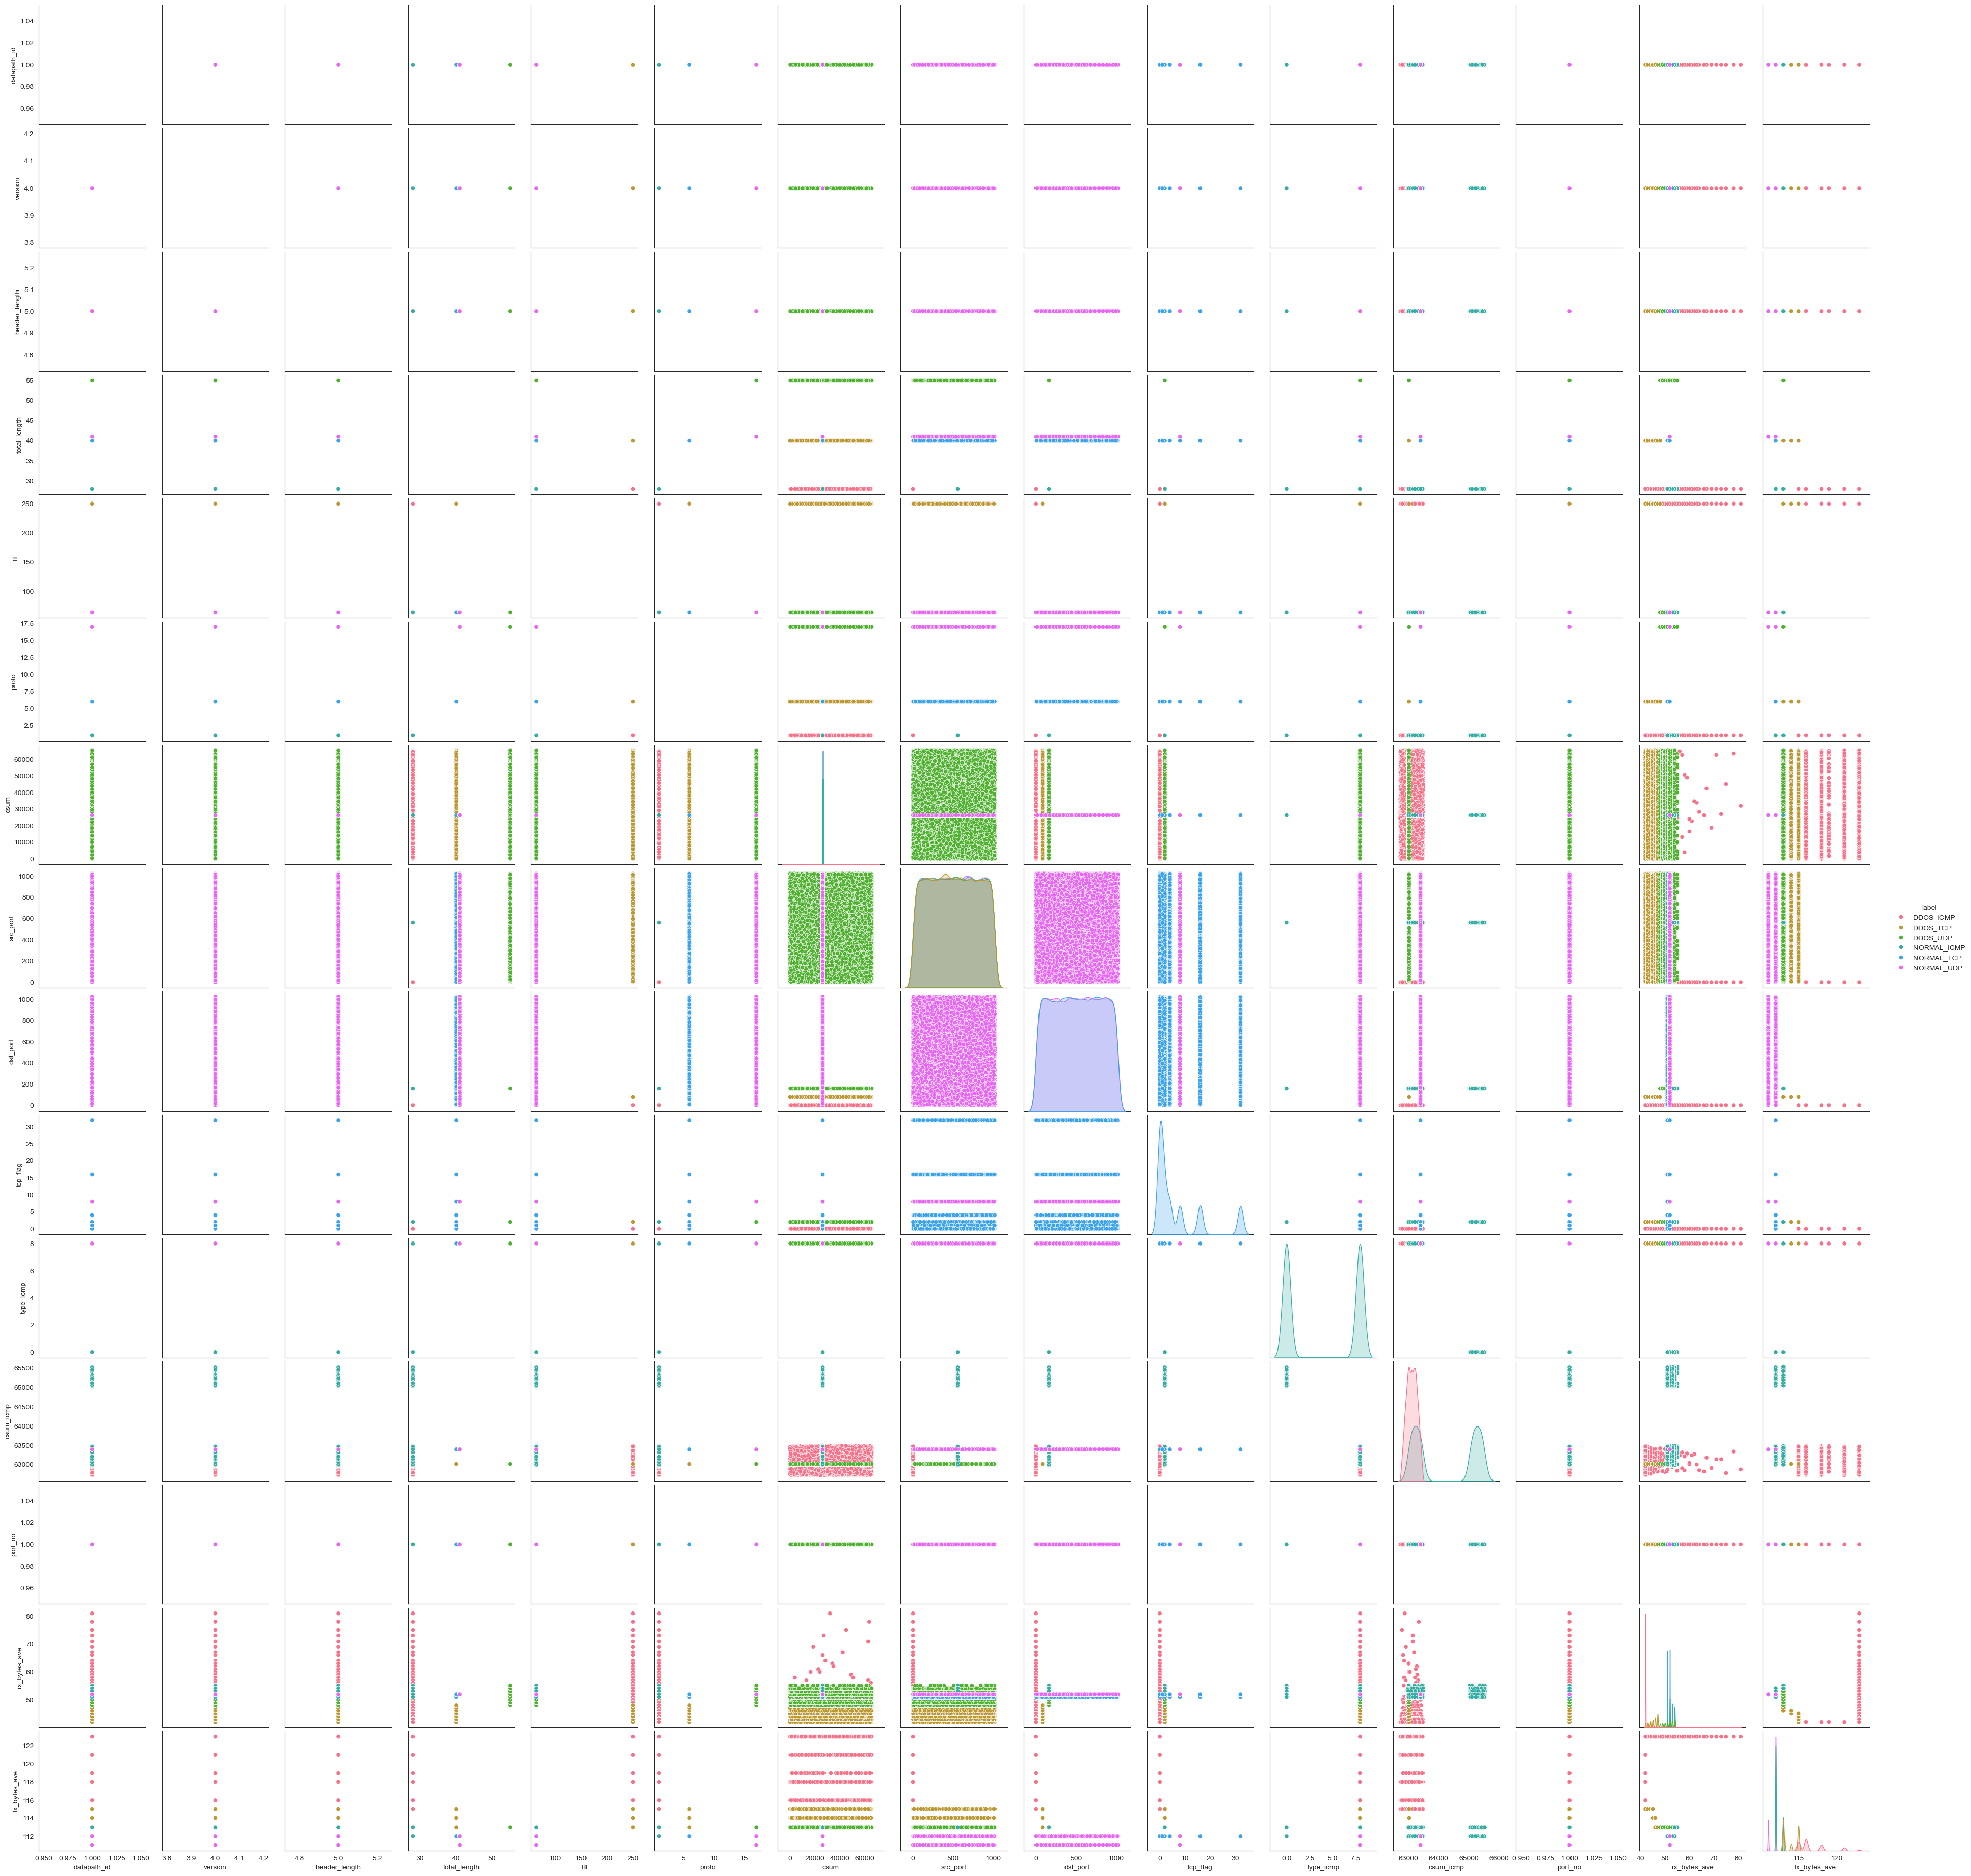

In [11]:
# menampilkan matriks plotting semua fitur
plt.figure(figsize=(8, 8))
ax = sns.pairplot(dataset, hue='label')
plt.show()

In [12]:
# Get unique categories from the 'label' column
unique_categories = dataset['label'].unique()

# Print the unique categories
print(unique_categories)

['DDOS_ICMP' 'DDOS_TCP' 'DDOS_UDP' 'NORMAL_ICMP' 'NORMAL_TCP' 'NORMAL_UDP']


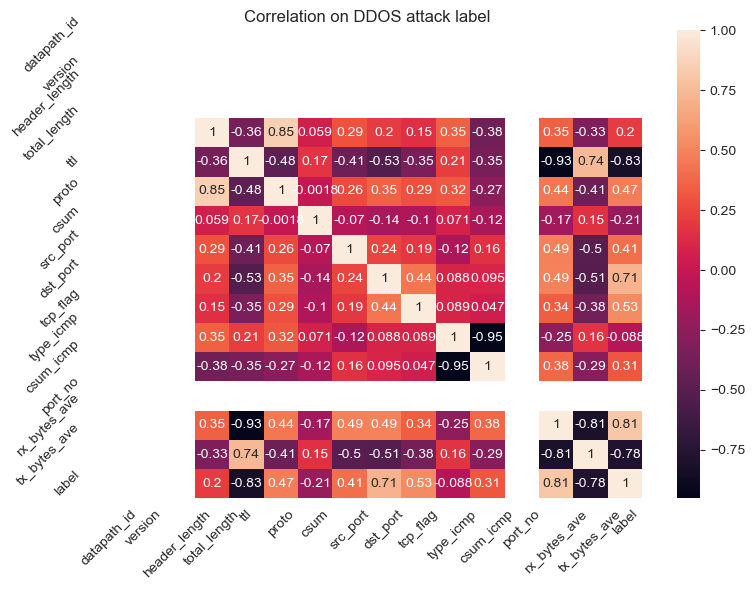

In [21]:
# Mengganti kolom label string ke Iris-setosa=1, Iris-versicolor=2, Iris-virginica=3
iris = dataset.replace(
{"label": {"DDOS_ICMP": 1, "DDOS_TCP": 2, "DDOS_UDP": 3, "NORMAL_ICMP": 4, "NORMAL_TCP": 5, "NORMAL_UDP": 6}})
# menampilkan heatmap (correlation matrix)
plt.figure(figsize=(8, 6))  
sns.heatmap(iris.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation on DDOS attack label")
plt.tight_layout()
plt.show()

In [42]:

# Calculate the correlation matrix directly
correlation_matrix = iris.corr()

# Convert correlation matrix to a flat Series
corr_values = correlation_matrix.stack()

# Sort by absolute correlation (descending order)
sorted_corr = corr_values.abs().sort_values(ascending=False)

# Print the most correlated features
print("From top to the least Correlated Features:")
for feature, correlation in sorted_corr[:50].items():
    print(f"{feature}: {correlation:.3f}")


From top to the least Correlated Features:
('total_length', 'total_length'): 1.000
('ttl', 'ttl'): 1.000
('tx_bytes_ave', 'tx_bytes_ave'): 1.000
('rx_bytes_ave', 'rx_bytes_ave'): 1.000
('csum_icmp', 'csum_icmp'): 1.000
('type_icmp', 'type_icmp'): 1.000
('tcp_flag', 'tcp_flag'): 1.000
('dst_port', 'dst_port'): 1.000
('src_port', 'src_port'): 1.000
('csum', 'csum'): 1.000
('proto', 'proto'): 1.000
('label', 'label'): 1.000
('type_icmp', 'csum_icmp'): 0.953
('csum_icmp', 'type_icmp'): 0.953
('rx_bytes_ave', 'ttl'): 0.932
('ttl', 'rx_bytes_ave'): 0.932
('total_length', 'proto'): 0.849
('proto', 'total_length'): 0.849
('label', 'ttl'): 0.828
('ttl', 'label'): 0.828
('rx_bytes_ave', 'label'): 0.813
('label', 'rx_bytes_ave'): 0.813
('tx_bytes_ave', 'rx_bytes_ave'): 0.809
('rx_bytes_ave', 'tx_bytes_ave'): 0.809
('tx_bytes_ave', 'label'): 0.784
('label', 'tx_bytes_ave'): 0.784
('tx_bytes_ave', 'ttl'): 0.744
('ttl', 'tx_bytes_ave'): 0.744
('dst_port', 'label'): 0.713
('label', 'dst_port'): 0.713

<Figure size 800x800 with 0 Axes>

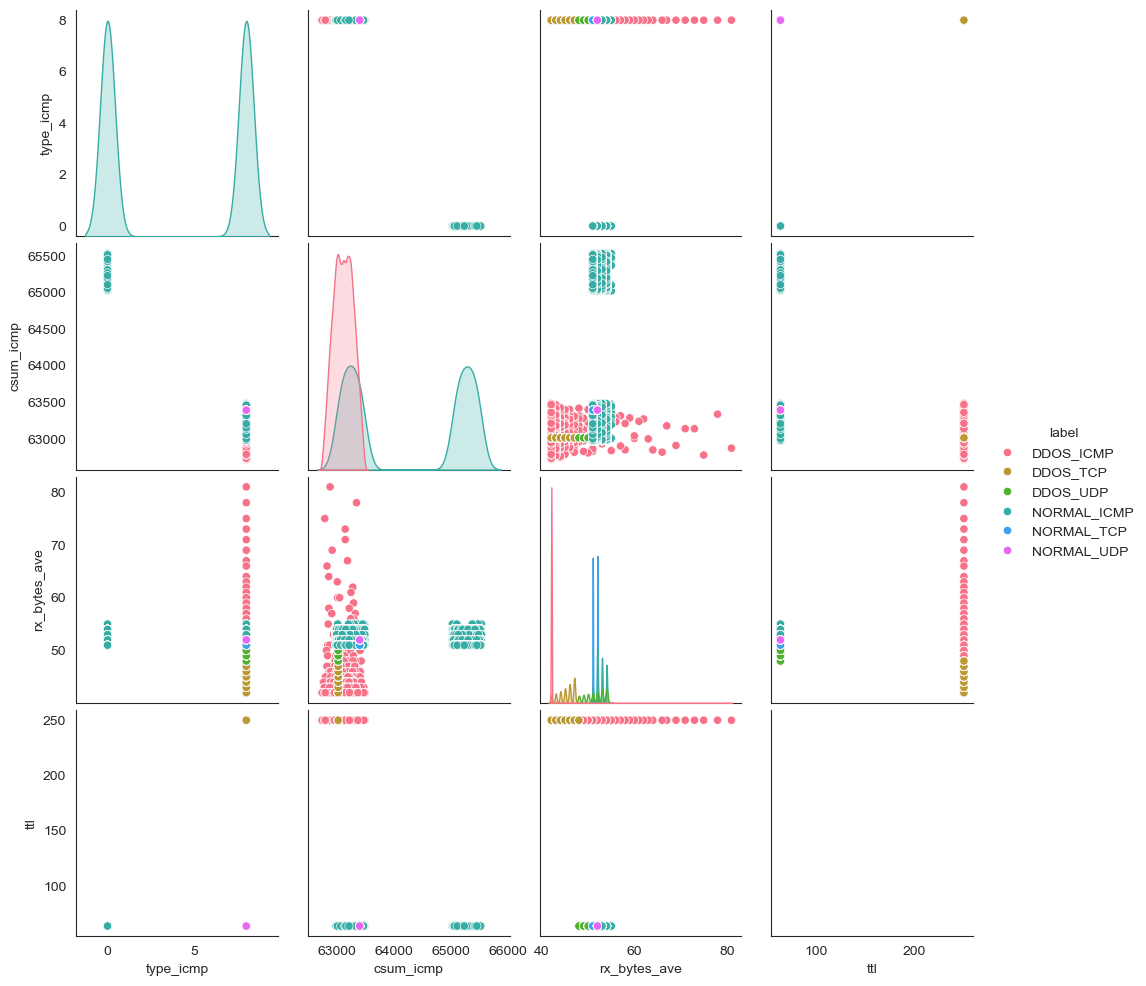

In [11]:
# Pilih kolom 
kolom= ['type_icmp', 'csum_icmp', 'rx_bytes_ave', 'ttl','label']

# Buat matriks plotting
plt.figure(figsize=(8, 8))
ax = sns.pairplot(dataset[kolom], hue='label')

# Tampilkan plot
plt.show()

C:\Users\u\AppData\Local\Temp\ipykernel_8036\431169381.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris = dataset.replace(


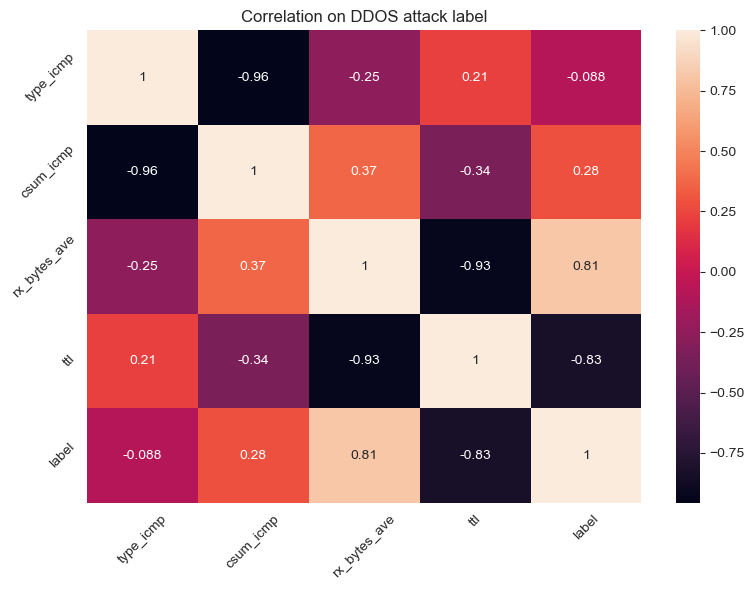

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengganti kolom label string ke numerik
iris = dataset.replace(
    {"label": {"DDOS_ICMP": 1, "DDOS_TCP": 2, "DDOS_UDP": 3, "NORMAL_ICMP": 4, "NORMAL_TCP": 5, "NORMAL_UDP": 6}}
)

# Pilih kolom yang diinginkan
kolom = ['type_icmp', 'csum_icmp', 'rx_bytes_ave', 'ttl', 'label']
iris_selected = iris[kolom]

# Menampilkan heatmap (correlation matrix) untuk kolom yang dipilih
plt.figure(figsize=(8, 6))  
sns.heatmap(iris_selected.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation on DDOS attack label")
plt.tight_layout()
plt.show()


In [69]:
# Train & Test Split
X = dataset.drop(['src_ip', 'dst_ip','label'], axis=1)
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=42)
# Prediksi & akurasi menggunakan algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train)
pred = nbc.predict(X_test)
print(accuracy_score(pred, y_test))



1.0


In [4]:
print(dataset.columns)

Index(['datapath_id', 'version', 'header_length', 'total_length', 'ttl',
       'proto', 'csum', 'src_port', 'dst_port', 'tcp_flag', 'type_icmp',
       'csum_icmp', 'port_no', 'rx_bytes_ave', 'tx_bytes_ave', 'label'],
      dtype='object')


In [75]:
def get_user_input():
    
    total_length = int(input("Masukkan total_length: "))
    ttl = int(input("Masukkan ttl: "))
    proto = int(input("Masukkan proto: "))
    csum = int(input("Masukkan csum: "))
    src_port = int(input("Masukkan src_port: "))
    dst_port = int(input("Masukkan dst_port: "))
    tcp_flag = int(input("Masukkan tcp_flag: "))
    type_icmp = int(input("Masukkan type_icmp: "))
    csum_icmp = int(input("Masukkan csum_icmp: "))
    port_no = int(input("Masukkan port_no: "))
    rx_bytes_ave = int(input("Masukkan rx_bytes_ave: "))
    tx_bytes_ave = int(input("Masukkan tx_bytes_ave: "))


    data_input = {
        'total_length': total_length,
        'ttl': ttl,
        'proto': proto,
        'csum': csum,
        'src_port': src_port,
        'dst_port': dst_port,
        'tcp_flag': tcp_flag,
        'type_icmp': type_icmp,
        'csum_icmp': csum_icmp,
        'port_no': port_no,
        'rx_bytes_ave': rx_bytes_ave,
        'tx_bytes_ave': tx_bytes_ave,
    }

    features_input = pd.DataFrame(data_input, index=[0])
    return features_input
